In [1]:
import os
from os.path import join
from glob import glob
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
ais_dir = join(os.path.expanduser("~"), "data", "AIS")
data_dir = join(ais_dir, "Syria")

In [3]:
data_files = glob(data_dir + "/*.csv")

In [4]:
dfs = [pd.read_csv(f, index_col=0) for f in data_files]

In [5]:
df = pd.concat(dfs)

In [6]:
data = df.copy()
data[["Date", "Time"]] = data.dt_pos_utc.str.split(" ", expand=True)
data["hour"] = pd.to_datetime(data["Time"], format="%H:%M:%S", errors="coerce").dt.hour
data["dtg"] = pd.to_datetime(data["Date"] + " " + data["Time"])
data = data.loc[data.Date < "2022-08-01"].copy()
data.drop(["Date", "Time", "hour", "dtg"], axis=1, inplace=True)

In [7]:
df_new = pd.read_csv(
    "s3://wbgdecinternal-ntl/Andres_Temp/AIS/AIS_Syria_2022-08-01_2023-03-20.csv",
    index_col=0,
)

In [8]:
df_turkey = pd.read_csv(
    "s3://wbgdecinternal-ntl/Andres_Temp/AIS/AIS_Turkey_2023-01-01_2023-03-20.csv",
    index_col=0,
)

In [9]:
df_turkey2 = pd.read_csv(
    "s3://wbgdecinternal-ntl/Andres_Temp/AIS/AIS_Isdemir_2022-08-01_2023-03-20.csv",
    index_col=0,
)

In [10]:
df = pd.concat([data, df_new])

In [11]:
len(df)

101691

In [12]:
len(df_turkey)

1269570

In [13]:
len(df_turkey2)

1719886

In [14]:
df_turkey = pd.concat([df_turkey, df_turkey2])

In [15]:
df_turkey.loc[df_turkey.polygon_name == "YAKACIK", "polygon_name"] = "Isdemir"

In [16]:
df_turkey.loc[:, "polygon_name"] = df_turkey.polygon_name.str.capitalize()

In [17]:
df = df.loc[df.polygon_name != "BANIYAS"].copy()

In [18]:
df = pd.concat([df, df_turkey])

In [19]:
df.loc[:, "polygon_name"] = df.polygon_name.str.capitalize()

In [20]:
# df_turkey.head()

In [21]:
df = df.loc[~df.mmsi.isna()].copy()

In [22]:
df.loc[:, "mmsi"] = df.loc[:, "mmsi"].astype("int")

In [23]:
# df.loc[:, "imo"] = df.loc[:, "imo"].astype('int')

In [24]:
df[["Date", "Time"]] = df.dt_pos_utc.str.split(" ", expand=True)

In [25]:
df["Date"] = pd.to_datetime(df["Date"])

In [26]:
df["ym"] = df["Date"].dt.strftime("%Y-%m")

In [27]:
drop_types = ["Reserved", "Passenger"]
df = df.loc[~(df.vessel_type.isin(drop_types))].copy()

In [28]:
df = df.loc[df["Date"] >= "2023-01-01"].copy()

In [29]:
df_sub = df[["Date", "polygon_name", "mmsi"]].copy()

In [30]:
df_sub.tail(2)

,Date,polygon_name,mmsi
1586009,2023-03-20,Isdemir,271072153
1586359,2023-03-20,Isdemir,538007475


In [31]:
df_sub = df_sub.drop_duplicates(subset=["Date", "mmsi"])

In [32]:
df_sub = df_sub.groupby(["Date", "polygon_name"]).count()

In [33]:
# df[['Date', 'polygon_name', 'mmsi']].groupby(['Date', 'polygon_name']).unique()

In [34]:
df_sub.reset_index(inplace=True)

In [35]:
df_sub.polygon_name.unique()

array(['Isdemir', 'Iskenderun', 'Mersin', 'Tartus', 'Al ladhiqiyah'],
      dtype=object)

In [36]:
# df_temp = df_sub.loc[df_sub['Date']>"2022-01-01"]

In [37]:
df_temp = df_sub.copy()

In [47]:
# df_temp['Date'] = pd.to_datetime(df_temp['Date'])

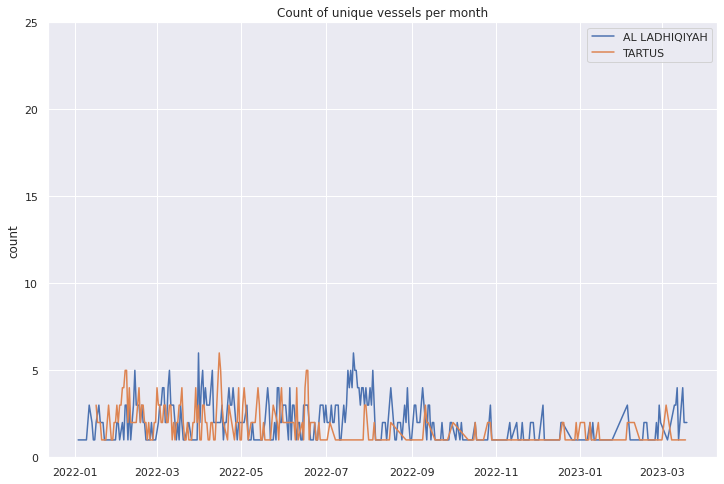

In [230]:
fig, ax = plt.subplots(figsize=(12, 8))

ax = sns.lineplot(
    data=df_temp,
    x="Date",
    y="mmsi",
    hue="polygon_name",
)

ax.set_title("Count of unique vessels per month")
ax.set_ylabel("count")
ax.set_xlabel("")
ax.set_ylim(ymin=0, ymax=25)

# plt.legend(title='Port')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
# x_dates = df_temp['Date'].dt.strftime('%Y-%m').sort_values().unique()
# ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')

In [38]:
sns.set()

In [40]:
df_temp.to_csv("Vessel Count Per Day.csv")

In [41]:
os.getcwd()

'/home/wb514197/Repos/syria-economic-monitor/notebooks/ais-analysis'

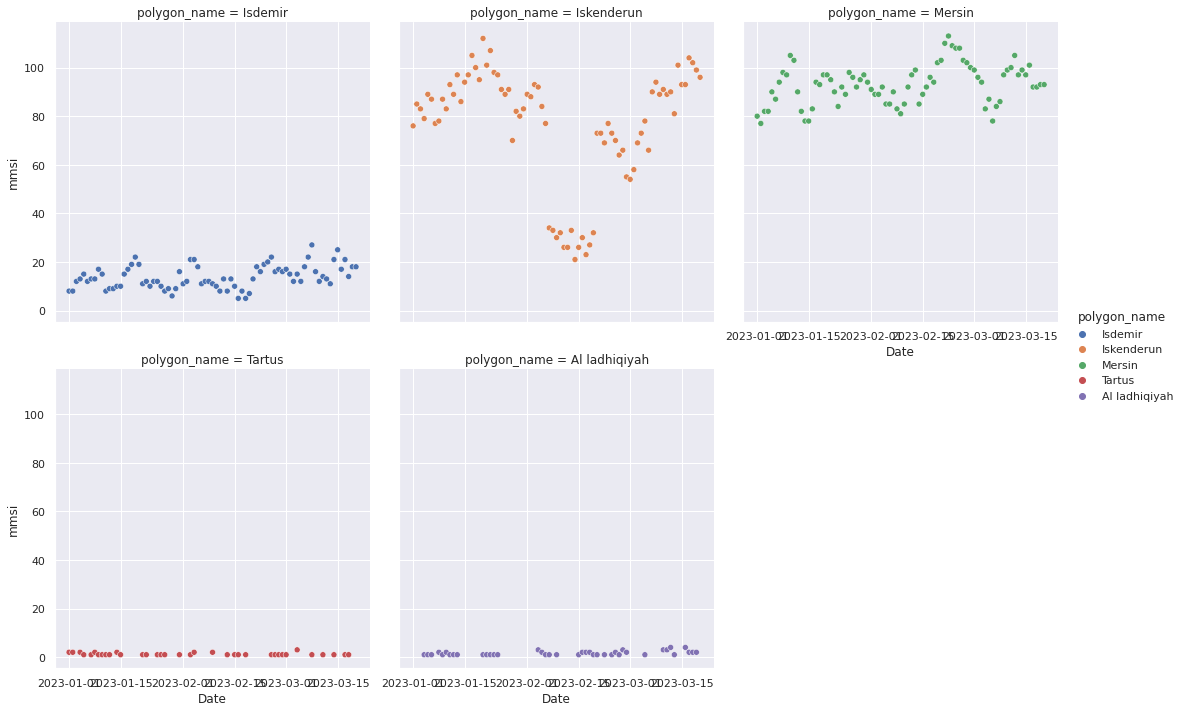

In [39]:
# fig, ax = plt.subplots(figsize=(12, 8))

sns.relplot(
    data=df_temp,
    x="Date",
    y="mmsi",
    hue="polygon_name",
    kind="scatter",
    col="polygon_name",
    col_wrap=3,
    #     ncol=2
)

# x_dates = df_temp['Date'].dt.strftime('%Y-%m-%d').sort_values().unique()
# ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
# ax.set_title("Count of unique vessels per day")
# ax.set_ylabel("count")
# ax.set_xlabel("")
# ax.set_ylim(ymin=0, ymax=25)

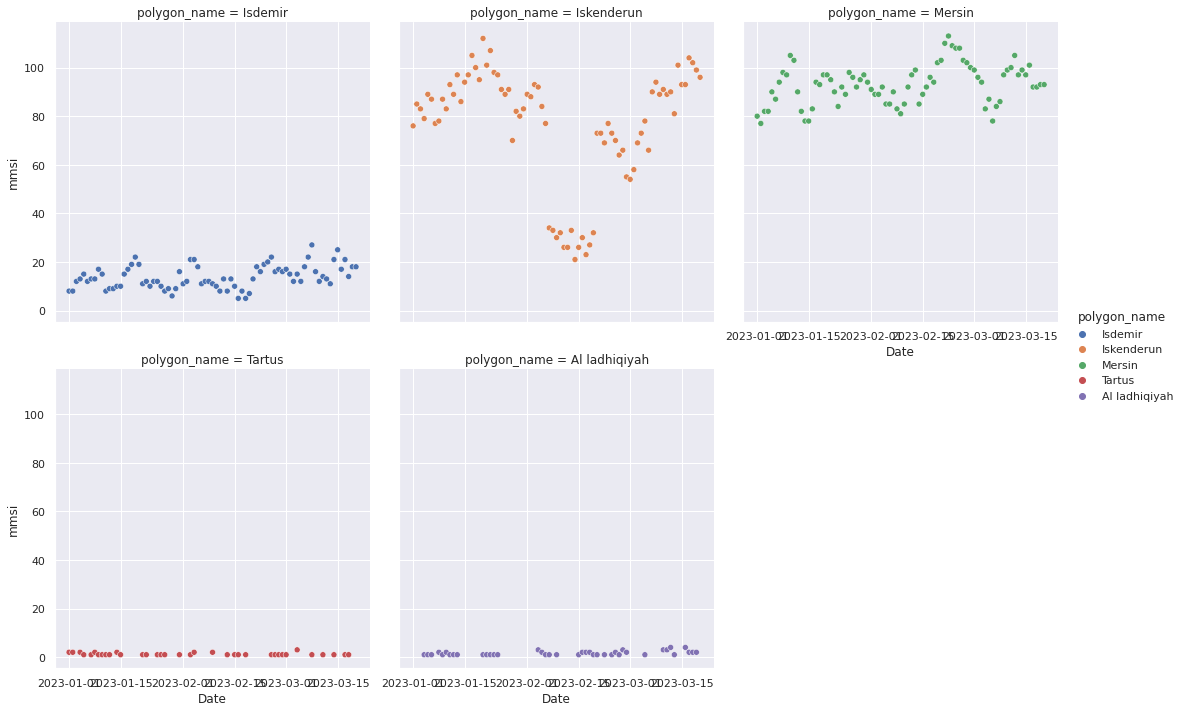

In [50]:
# fig, ax = plt.subplots(figsize=(12, 8))

sns.relplot(
    data=df_temp,
    x="Date",
    y="mmsi",
    hue="polygon_name",
    kind="scatter",
    col="polygon_name",
    col_wrap=3,
    #     ncol=2
)

# x_dates = df_temp['Date'].dt.strftime('%Y-%m-%d').sort_values().unique()
# ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
# ax.set_title("Count of unique vessels per day")
# ax.set_ylabel("count")
# ax.set_xlabel("")
# ax.set_ylim(ymin=0, ymax=25)

In [43]:
import matplotlib.dates as mdates

In [56]:
g.axes[0]

<AxesSubplot:title={'center':'polygon_name = ISKENDERUN'}, xlabel='Date', ylabel='mmsi'>

In [51]:
os.getcwd()

'/home/wb514197/Repos/syria-economic-monitor/notebooks/ais-analysis'

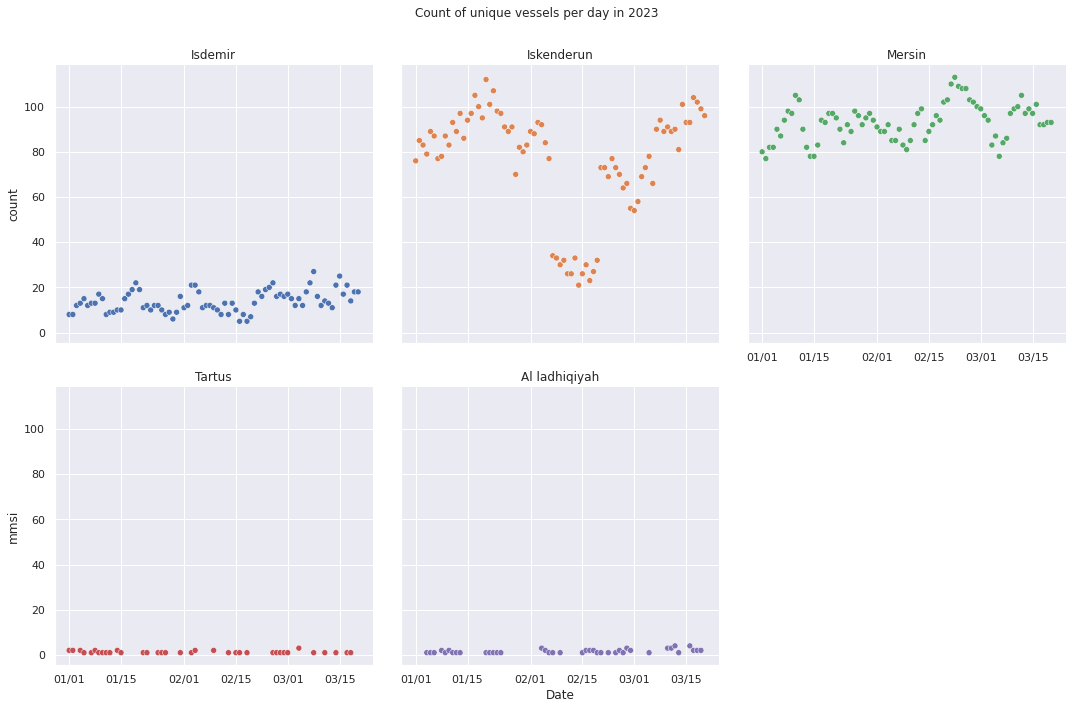

In [50]:
# fig, ax = plt.subplots(figsize=(12, 8))

g = sns.relplot(
    data=df_temp,
    x="Date",
    y="mmsi",
    hue="polygon_name",
    kind="scatter",
    col="polygon_name",
    col_wrap=3,
    legend=False,
)

# dates = df_temp['Date'].dt.strftime('%Y-%m-%d').sort_values().unique()
xformatter = mdates.DateFormatter("%m/%d")
g.axes[0].xaxis.set_major_formatter(xformatter)
g.axes[0].set_ylabel("count")
g.axes[2].set_ylabel("count")
g.axes[2].set_xlabel("")
g.axes[3].set_xlabel("")

g.set_titles(template="{col_name}")

g.fig.subplots_adjust(top=0.9)  # adjust the Figure in rp
g.fig.suptitle("Count of unique vessels per day in 2023")
g.fig.savefig("Vessel Count.jpeg", dpi=300)

Text(0.5, 0.98, 'Count of unique vessels per day in 2023')

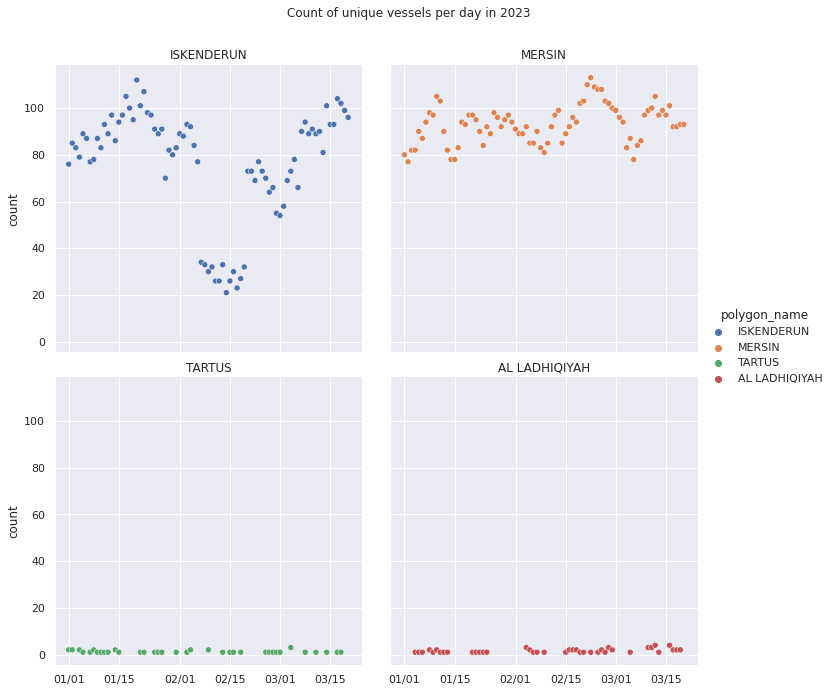

In [76]:
# fig, ax = plt.subplots(figsize=(12, 8))

g = sns.relplot(
    data=df_temp,
    x="Date",
    y="mmsi",
    hue="polygon_name",
    kind="scatter",
    col="polygon_name",
    col_wrap=2,
)

# dates = df_temp['Date'].dt.strftime('%Y-%m-%d').sort_values().unique()
xformatter = mdates.DateFormatter("%m/%d")
g.axes[0].xaxis.set_major_formatter(xformatter)
g.axes[0].set_ylabel("count")
g.axes[2].set_ylabel("count")
g.axes[2].set_xlabel("")
g.axes[3].set_xlabel("")

g.set_titles(template="{col_name}")

g.fig.subplots_adjust(top=0.9)  # adjust the Figure in rp
g.fig.suptitle("Count of unique vessels per day in 2023")

Text(0.5, 0.98, 'Count of unique vessels per day in 2023')

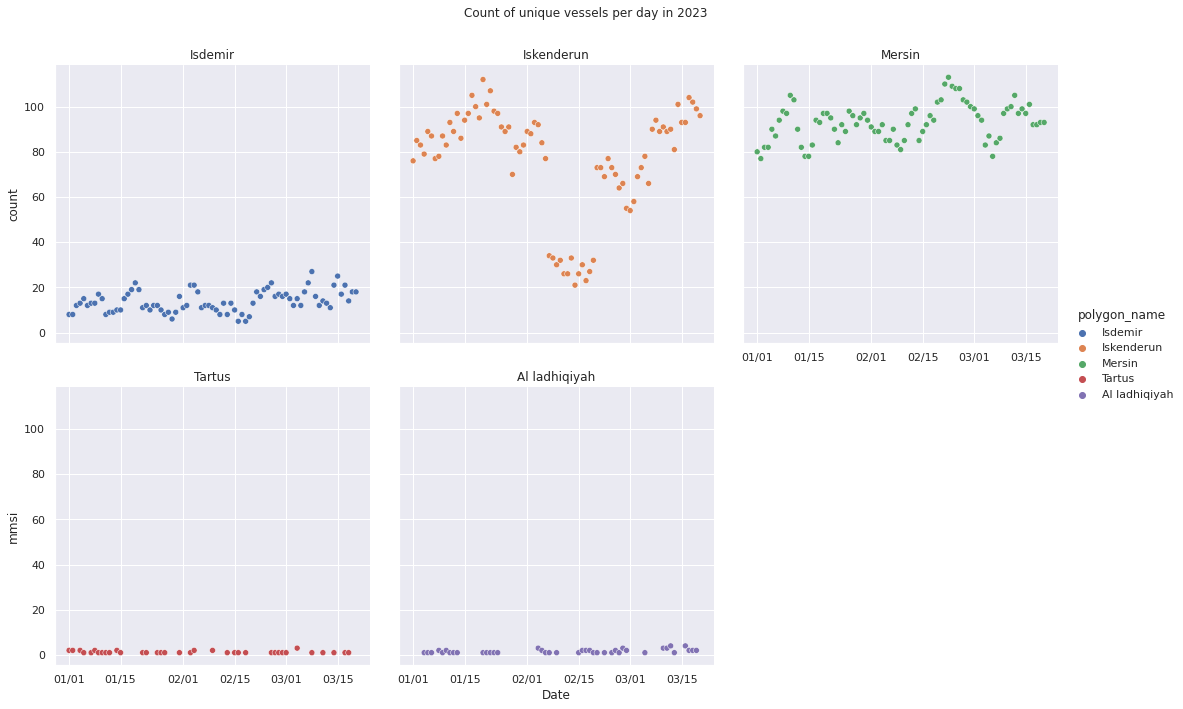

In [53]:
# fig, ax = plt.subplots(figsize=(12, 8))

g = sns.relplot(
    data=df_temp,
    x="Date",
    y="mmsi",
    hue="polygon_name",
    kind="scatter",
    col="polygon_name",
    col_wrap=3,
)

# dates = df_temp['Date'].dt.strftime('%Y-%m-%d').sort_values().unique()
xformatter = mdates.DateFormatter("%m/%d")
g.axes[0].xaxis.set_major_formatter(xformatter)
g.axes[0].set_ylabel("count")
g.axes[2].set_ylabel("count")
g.axes[2].set_xlabel("")
g.axes[3].set_xlabel("")

g.set_titles(template="{col_name}")

g.fig.subplots_adjust(top=0.9)  # adjust the Figure in rp
g.fig.suptitle("Count of unique vessels per day in 2023")